### Импорт библиотек

In [35]:
# data manipulation
import pandas as pd

# data visualisation
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets

### Загрузка данных

In [36]:
data = pd.read_csv('./train.csv')[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',\
                                   'FullBath', 'YearBuilt', 'HouseStyle']]

In [ ]:
# SalePrice - сумма прожажи
# OverallQual - качество отделка
# GrLivArea - жилая площадь, м2
# GarageCars - кол-во мест в гараже
# TotalBsmtSF - площадь подвала
# FullBath - кол-во ванных комнат
# YearBuilt - дата постройки
# HouseStyle - стиль постройки

### Полезные фишечки

In [37]:
data.head()
# data.tail()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,HouseStyle
0,208500,7,1710,2,856,2,2003,2Story
1,181500,6,1262,2,1262,2,1976,1Story
2,223500,7,1786,2,920,2,2001,2Story
3,140000,7,1717,3,756,1,1915,2Story
4,250000,8,2198,3,1145,2,2000,2Story


In [38]:
data.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'HouseStyle'],
      dtype='object')

In [39]:
data.shape

(1460, 8)

In [41]:
data.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808
std,79442.502883,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000
50%,163000.000000,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000
75%,214000.000000,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000
max,755000.000000,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000


In [42]:
data.dtypes

SalePrice       int64
OverallQual     int64
GrLivArea       int64
GarageCars      int64
TotalBsmtSF     int64
FullBath        int64
YearBuilt       int64
HouseStyle     object
dtype: object

In [43]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [44]:
data['GarageCars'].value_counts(normalize=True)

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

In [45]:
data['SalePrice'].quantile([.5,.7,.9,.99])

0.50    163000.00
0.70    198620.00
0.90    278000.00
0.99    442567.01
Name: SalePrice, dtype: float64

In [46]:
data['SalePrice'].min(), data['SalePrice'].max(), data['SalePrice'].median(), data['SalePrice'].mean()

(34900, 755000, 163000.0, 180921.19589041095)

In [47]:
data['SalePrice'].agg(['min','max','mean','median'])

min        34900.00000
max       755000.00000
mean      180921.19589
median    163000.00000
Name: SalePrice, dtype: float64

In [84]:
data['SalePrice'].skew(), data['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

### Типы данных
Признаки делятся на:
- количественные (numeric)
- категориальные (categorical)

Количественные - непрерывные (continuous) и дискретные (discrete) </br>
Категориальные - номинативные (nominal) и порядковые (ordinal)


### Количественные

Простая гистогорамма с использованием функций отрисовки пандаса

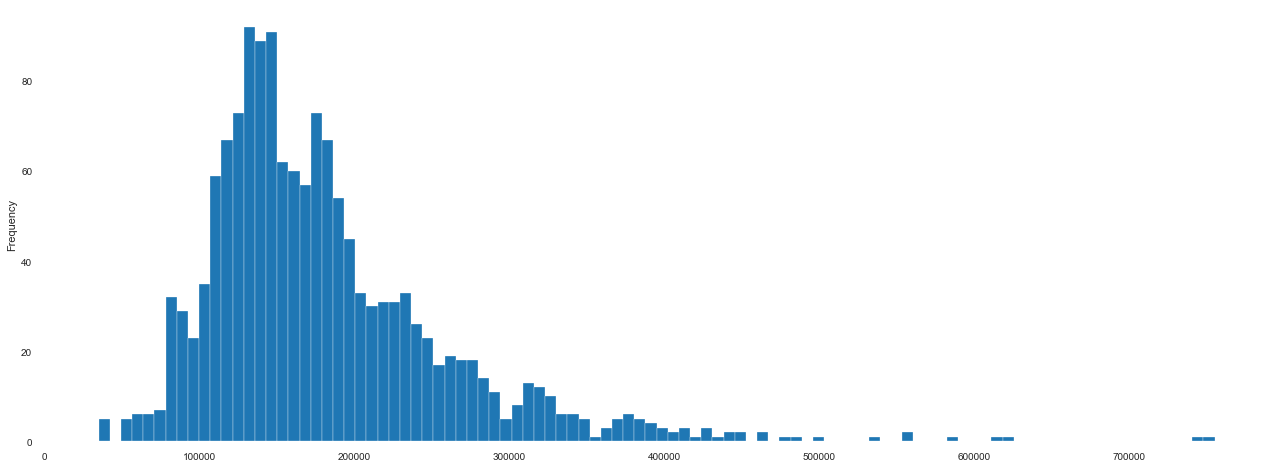

In [55]:
data.SalePrice.plot(kind='hist', figsize=(22,8), bins=100);

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Гистограмма с использованием seaborn

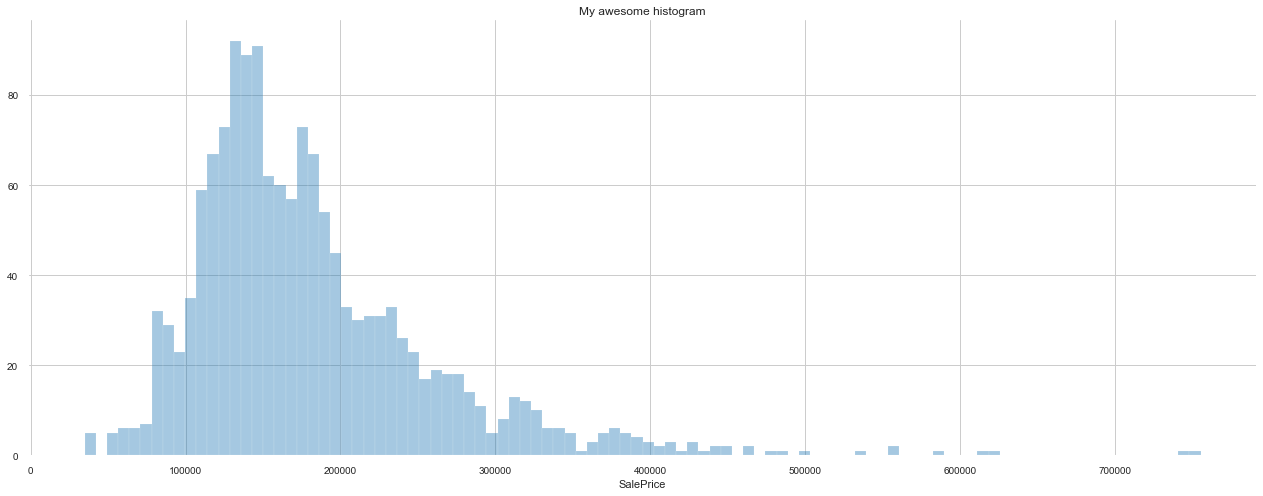

In [56]:
# ax = data.SalePrice.plot(kind='hist', figsize=(22,8), bins=200, xlim=(0,500000), facecolor='g', alpha=0.75);
plt.figure(figsize=(22,8));
ax = sns.distplot(data.SalePrice, kde=False, hist=True, bins=100);
ax.set_title('My awesome histogram');
ax.grid(True);

https://seaborn.pydata.org/generated/seaborn.distplot.html

Catplot: Box-plot

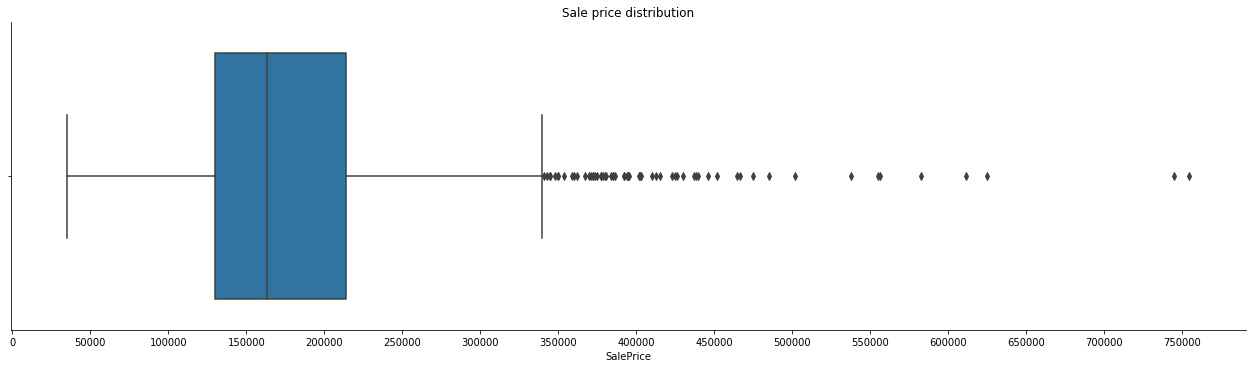

In [20]:
ax = sns.catplot(data=data, x='SalePrice', kind='box', aspect=3.5);
ax.set(title=('Sale price distribution'), xticks=range(0,800000,50000));

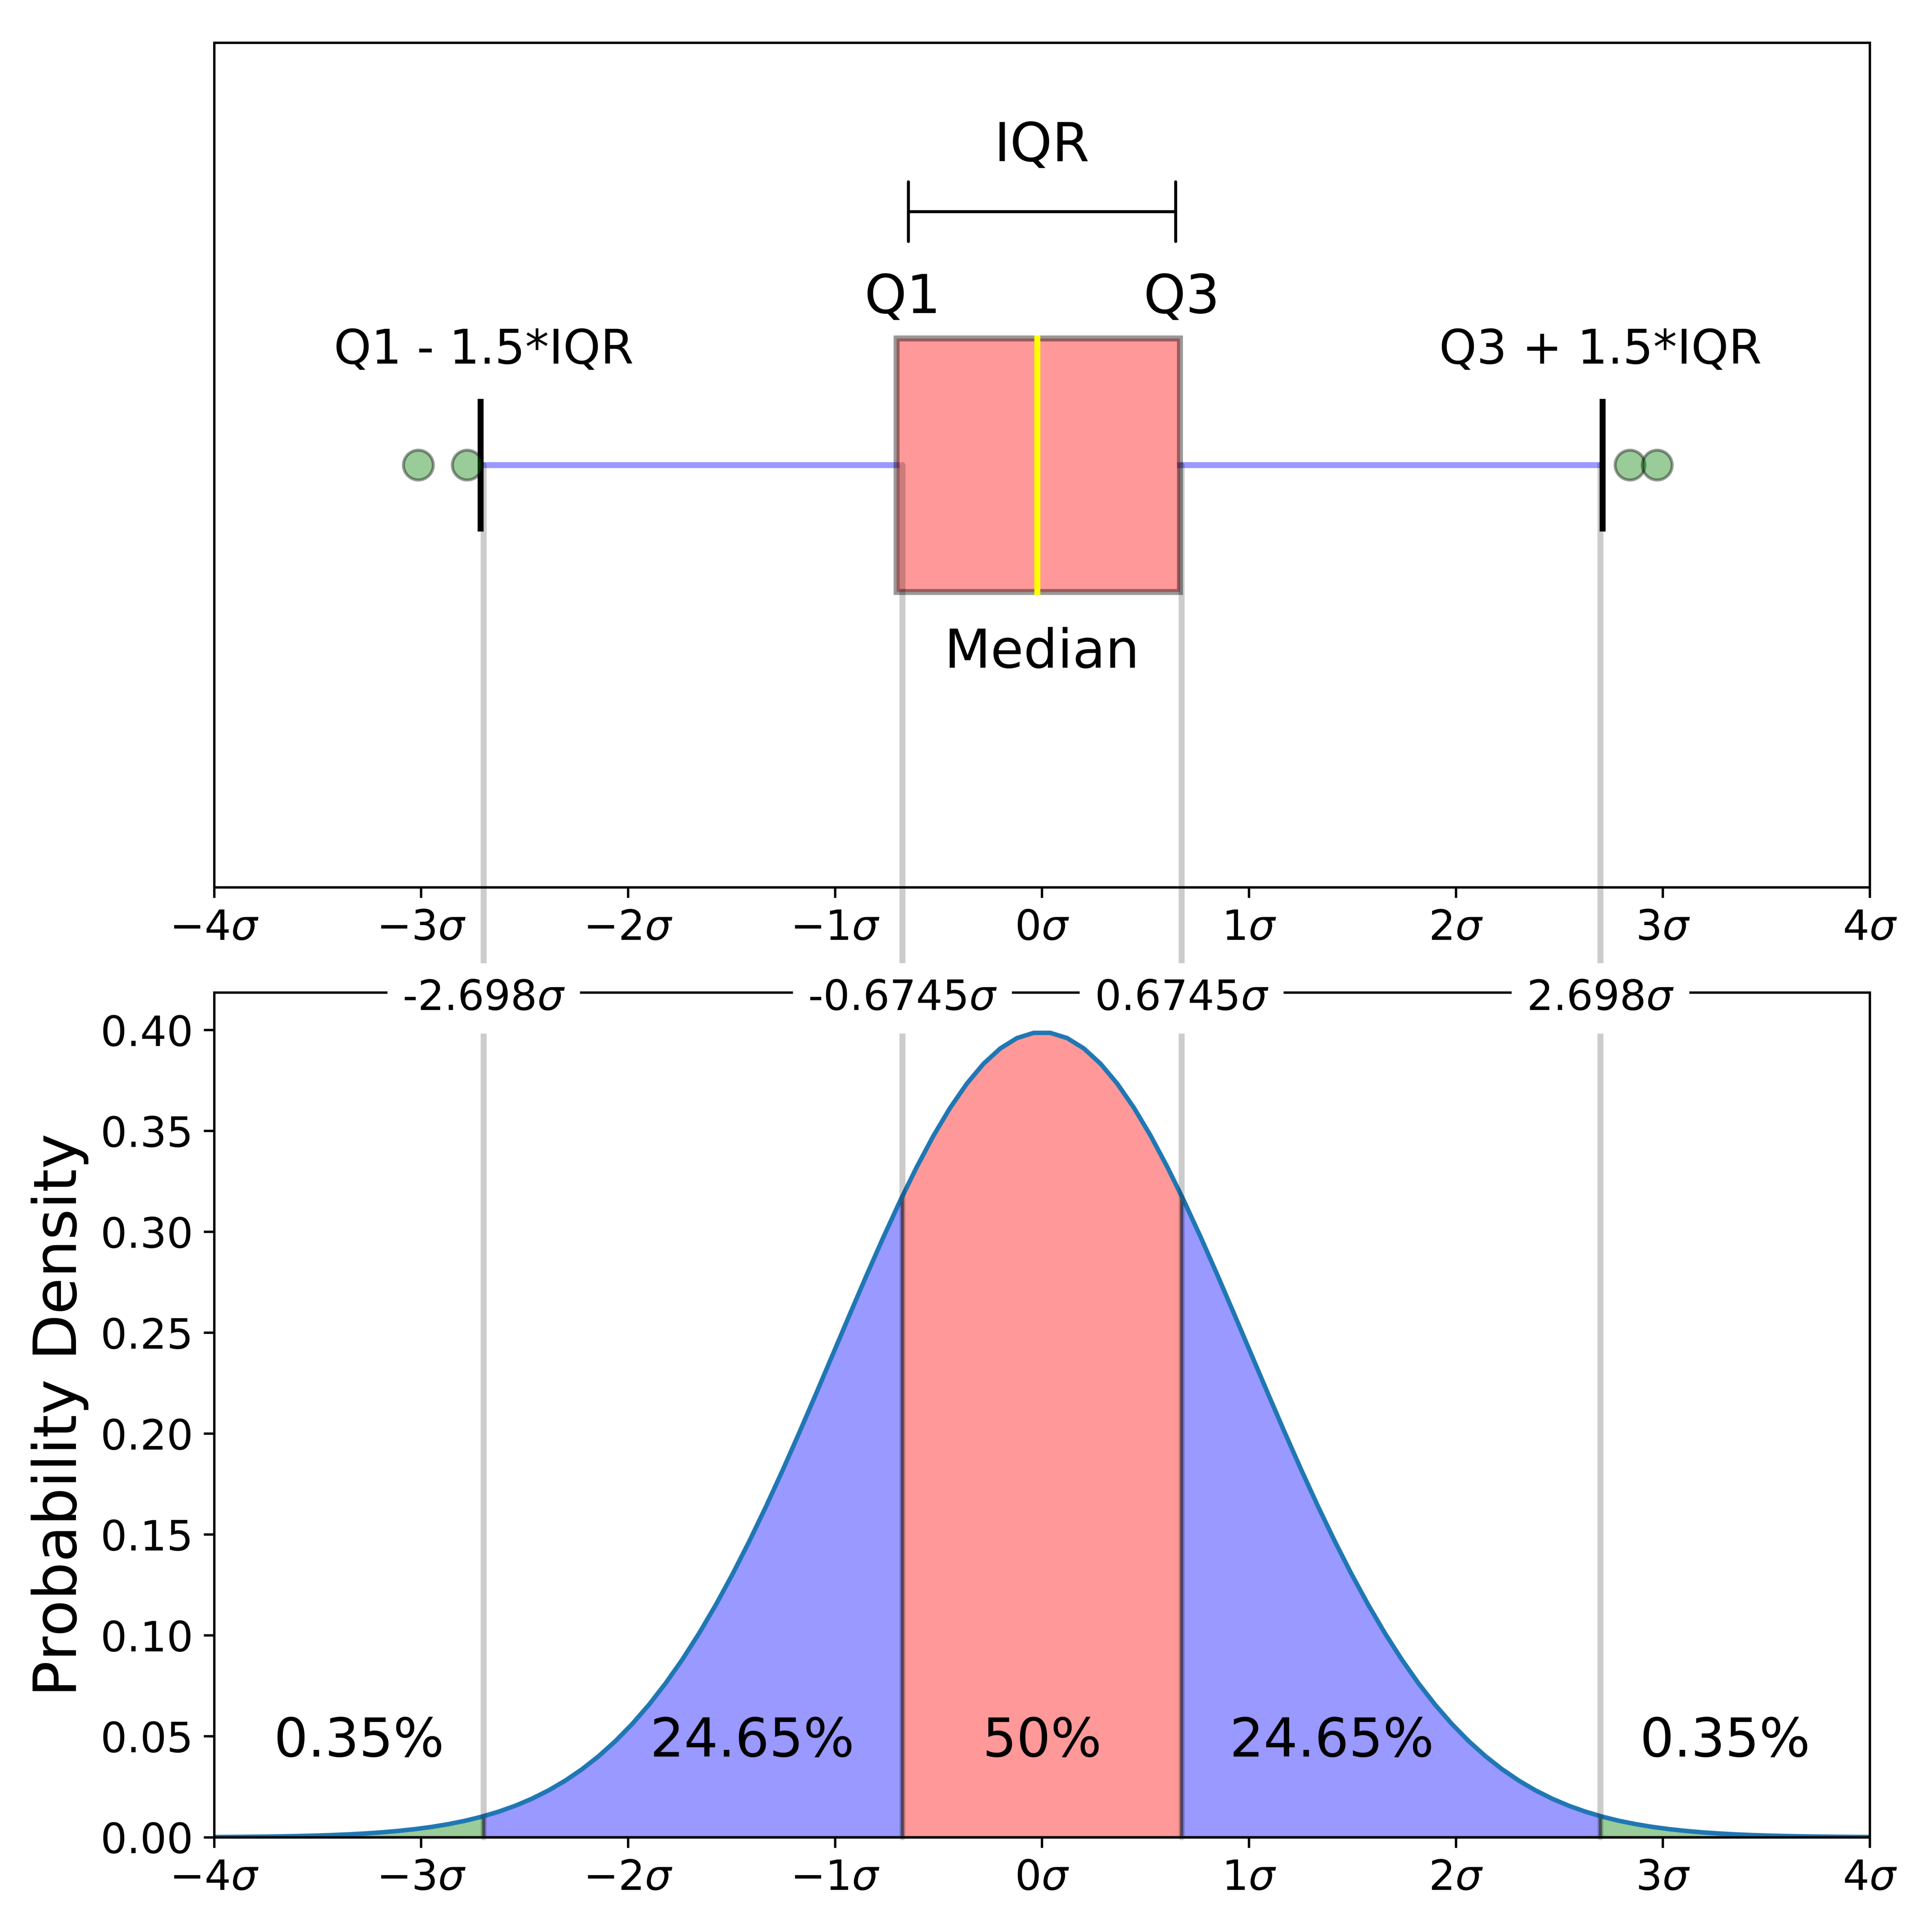

https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

#### Категориальные

In [80]:
data.HouseStyle.sample(5)

872    1Story
300    1Story
540    1Story
970    1.5Fin
111      SLvl
Name: HouseStyle, dtype: object

In [82]:
data.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Catplot: count plot

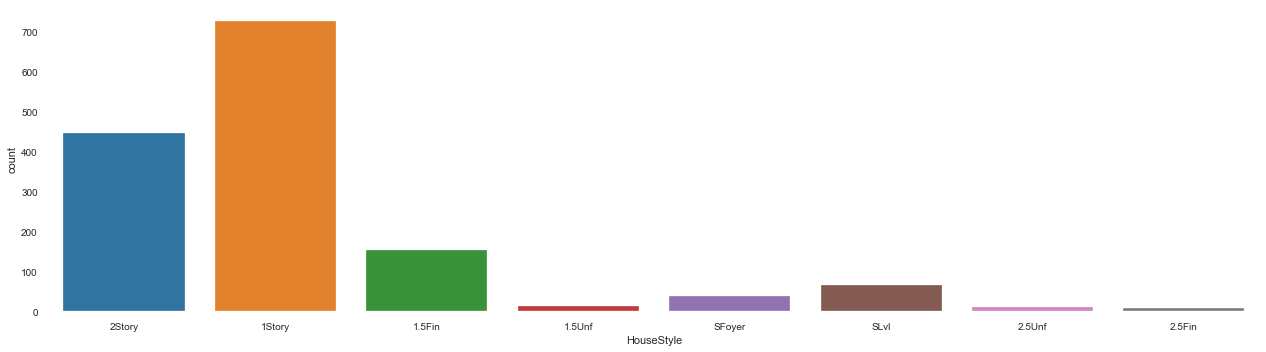

In [77]:
sns.catplot(data=data, x='HouseStyle', kind='count', aspect=3.5);

### Pair relations

Scatter plot

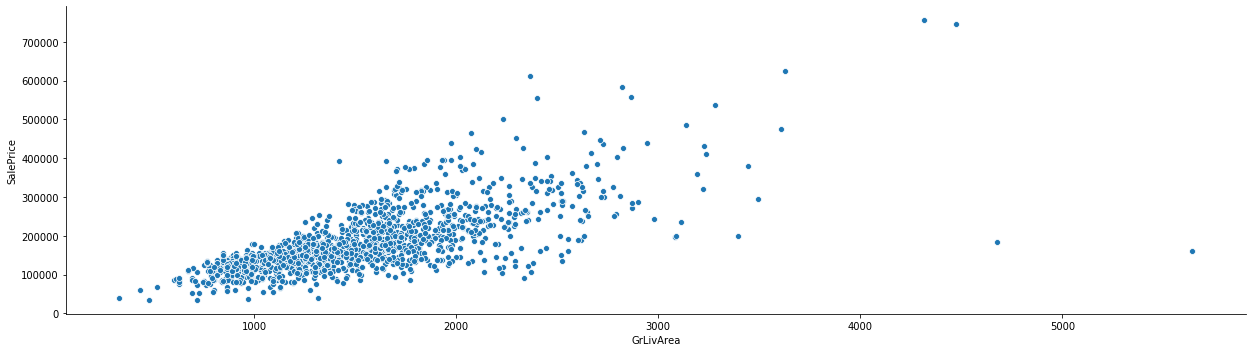

In [22]:
ax = sns.relplot(data=data, y='SalePrice', x='GrLivArea', kind='scatter', aspect=3.5)

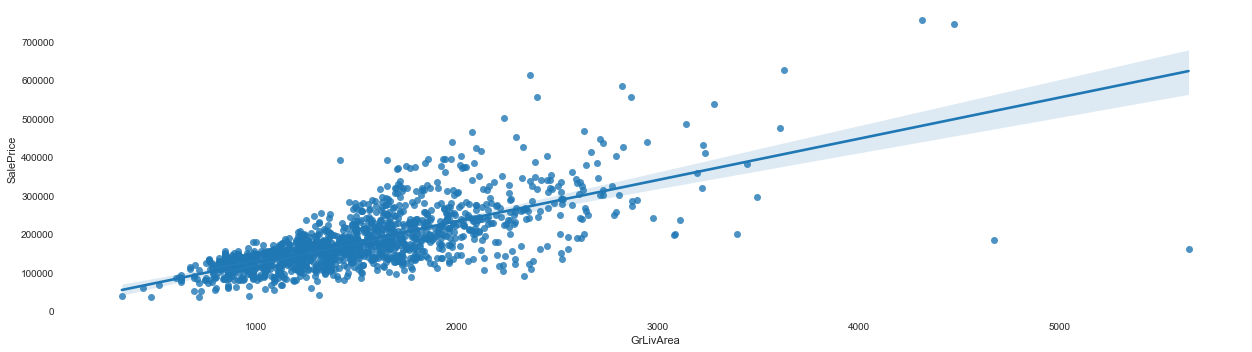

In [58]:
ax = sns.lmplot(data=data, y='SalePrice', x='GrLivArea', aspect=3.5);

Использование группировки в данных

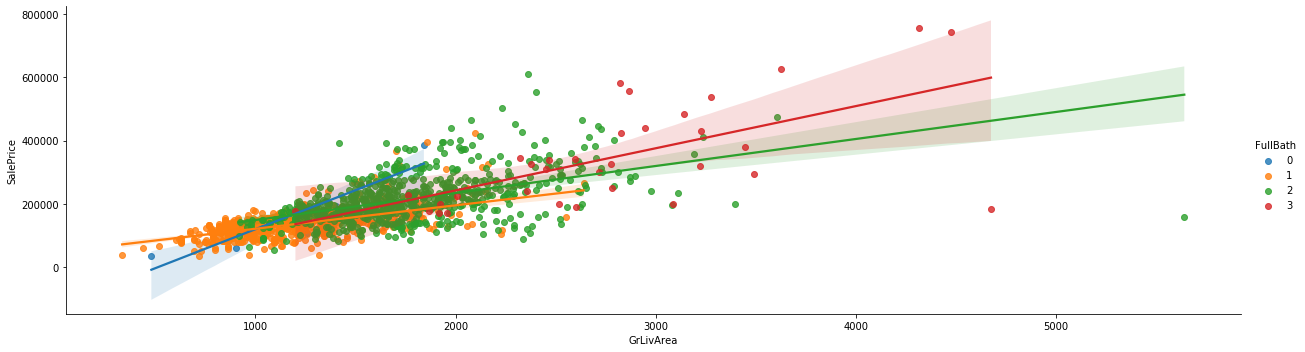

In [23]:
ax = sns.lmplot(data=data, y='SalePrice', x='GrLivArea', hue='FullBath', aspect=3.5);

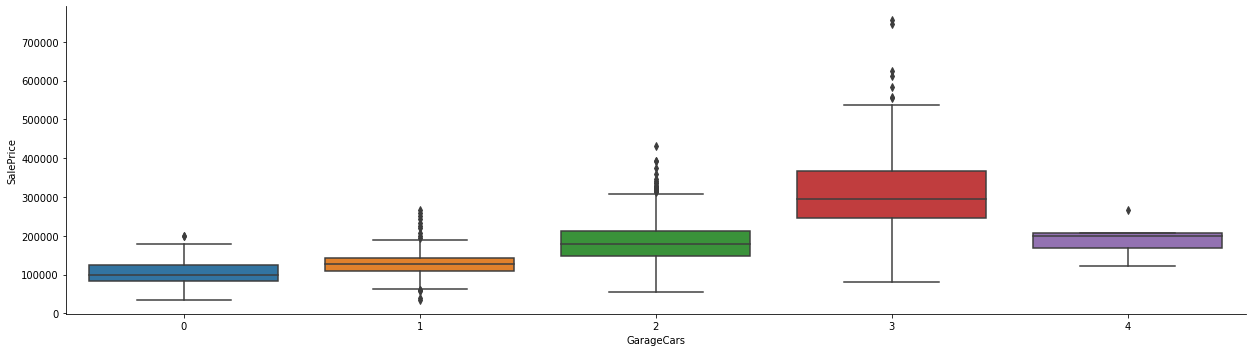

In [24]:
ax = sns.catplot(data=data, y='SalePrice', x='GarageCars', kind='box', aspect=3.5)

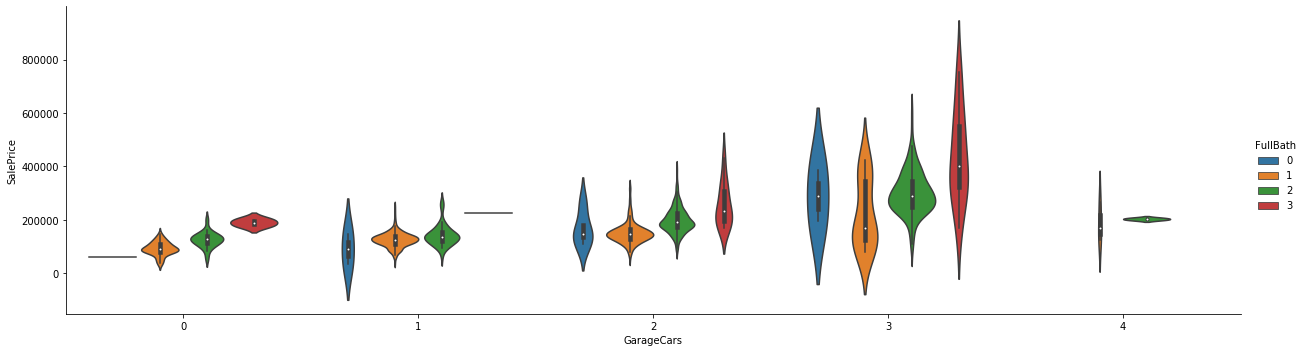

In [27]:
ax = sns.catplot(data=data, y='SalePrice', x='GarageCars', kind='violin', hue='FullBath', aspect=3.5)

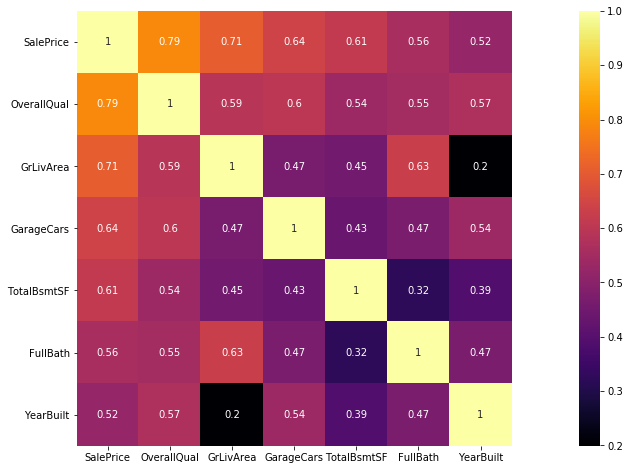

In [28]:
corr = data.corr(method='pearson')

plt.figure(figsize=(24,8));
sns.heatmap(corr, square=True, cmap='inferno', annot=True);

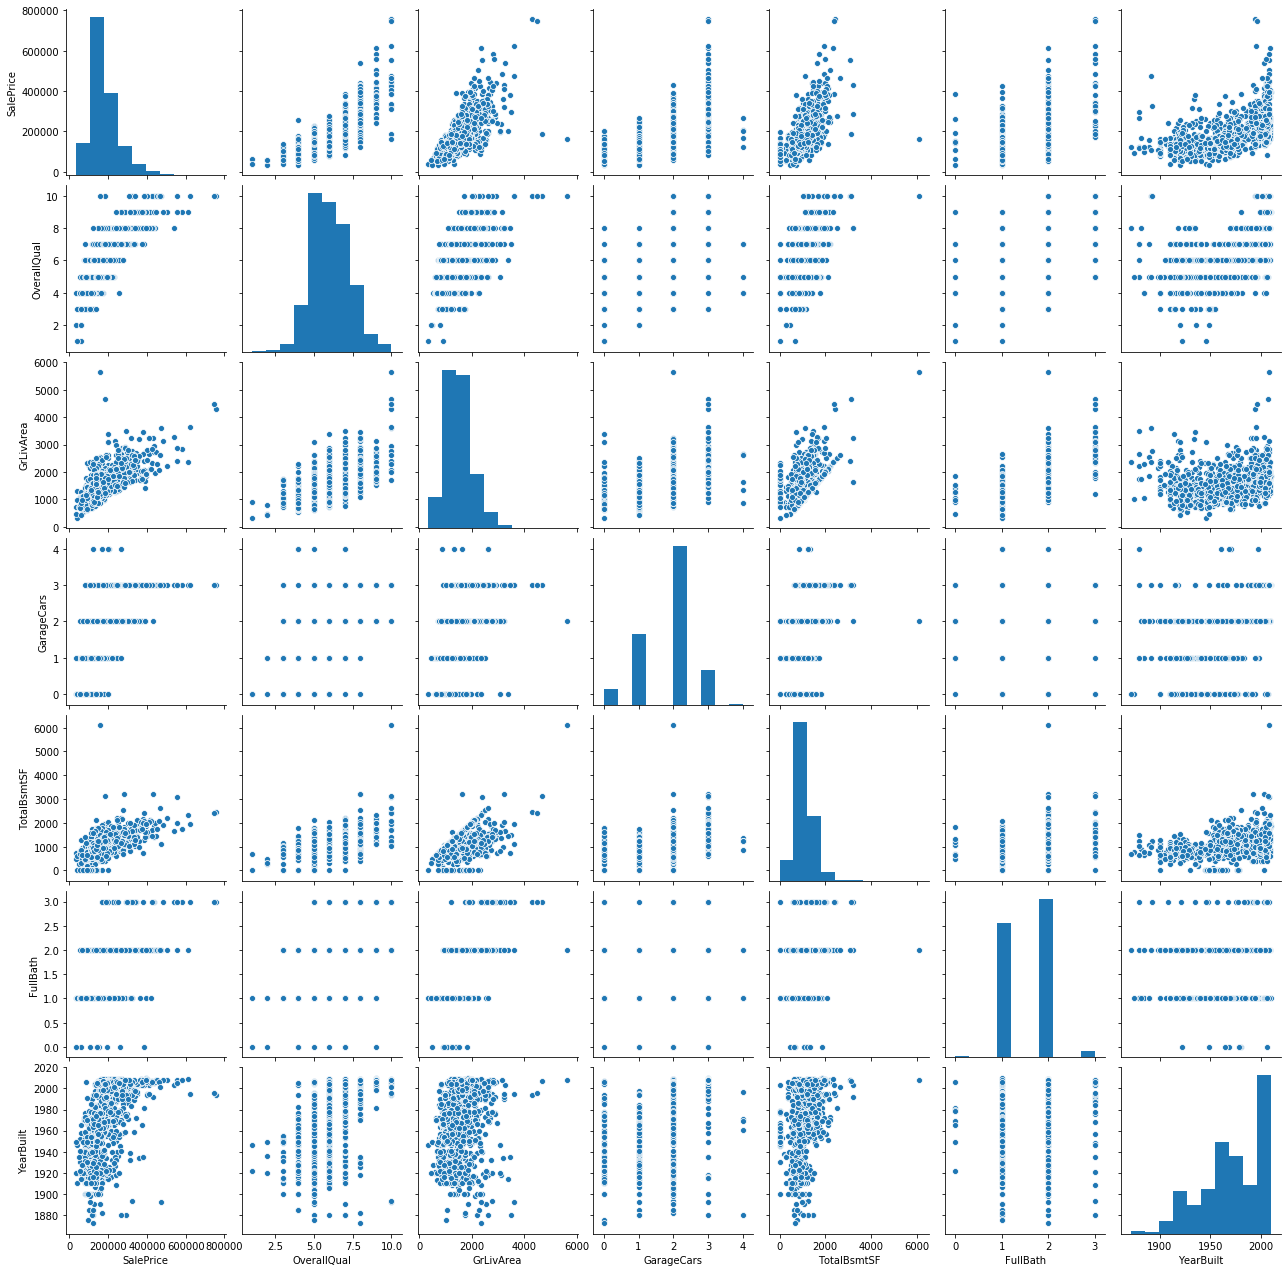

In [29]:
sns.pairplot(data);

In [30]:
import pandas_profiling as pf

In [33]:
profile = pf.ProfileReport(data)
# profile.to_widgets()

In [34]:
profile.to_file(output_file="output.html")